<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch2_IntroToBisection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the bisection method for root finding

We'll demonstrate using [Lambert's W function](https://en.wikipedia.org/wiki/Lambert_W_function) $W$, which is defined as the inverse of $xe^{x}$ (just as the logarithm is the inverse of $e^x$), i.e., $y=W(x)$ means $x=ye^y$.

Thus, to find $y=W(x)$ for a given value of $x$, we solve the root finding problem
$$
ye^y - x = 0
$$
for $y$ (recall, we think of $x$ as fixed).

Let's pick a value of $x$, say, $x=20$.

We'll start by plotting $ye^y - x$ to get an idea of a good interval to start in.  Since $e^y>0$ always, we note that $x$ and $y$ should have the same sign, so we can restrict to $y > 0$.

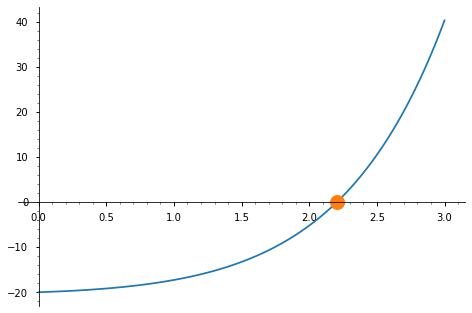

In [75]:
import numpy as np

x = 20
f = lambda y : y*np.exp(y) - x


# Let's also get a "true" answer, or at least a fairly good one
import scipy.special.lambertw as W

trueAnswer = np.real( W(20) )
relError = lambda guess : abs( guess - trueAnswer )/abs(trueAnswer)
correctDigits = lambda guess : -np.log10( relError(guess) + 1e-17)

# Plotting

yGrid = np.linspace(0,3,100)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

fig, ax = plt.subplots()
plt.plot(yGrid,f(yGrid))
plt.plot( trueAnswer,f(trueAnswer),'o',markersize=15)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.minorticks_on()

## Write a code to run the bisection method.
The inputs should be a bracketing interval $[a,b]$ and a function $f$.  Do **not** hardcode in our particular function. We will pass it in as `f`.

You also need some kind of stopping condition

In [69]:
# midpoint = lambda a,b : (a+b)/2
midpoint = lambda a,b : a + (b-a)/2

errorBound = lambda a,b : (b-a)/2

oppositeSign = lambda fa,fb :  np.sign(fa)*np.sign(fb) < 0

def bisection( f, interval, tol=1e-9, maxIters = 100):
  """Assuming f is continuous and changes sign on the interval,
  this returns an approximation of a root

  bisection( f, interval, tol=[...], maxIters=[...])
    interval = (a,b)  should be a tupple
  """
  a,b = interval  # unpack it
  fa,fb = f(a),f(b)
  if not oppositeSign(fa,fb):
    raise ValueError('Interval function does not change sign, may not contain root')
  if errorBound( fa, fb) < tol:
    return
  
  p   = midpoint(a,b)
  fp  = f(p)
  history = [p]
  fcn_history = [fp]
  iters = 0

  while errorBound( fa, fb) > tol and iters <= maxIters :
    iters += 1

    if oppositeSign( fa, fp ):
      b,fb = p,fp
    else:
      a,fa = p,fp

    p   = midpoint(a,b)
    fp  = f(p)
    history.append(p)
    fcn_history.append(fp)
  return p, history, fcn_history

### Run the code

In [71]:
p, history, fcn_history = bisection(f, (1.5,2.5), tol = 1e-14 )

for i,(p,fp) in enumerate( zip(history,fcn_history) ):
  print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}. We have {:4.1f} correct digits on p".format(i,p,abs(fp),correctDigits(p)))

Iter  0, p=2.0000000000000000, |f(p)| = 5.22e+00. We have  1.0 correct digits on p
Iter  1, p=2.2500000000000000, |f(p)| = 1.35e+00. We have  1.7 correct digits on p
Iter  2, p=2.1250000000000000, |f(p)| = 2.21e+00. We have  1.4 correct digits on p
Iter  3, p=2.1875000000000000, |f(p)| = 5.03e-01. We have  2.1 correct digits on p
Iter  4, p=2.2187500000000000, |f(p)| = 4.03e-01. We have  2.2 correct digits on p
Iter  5, p=2.2031250000000000, |f(p)| = 5.45e-02. We have  3.1 correct digits on p
Iter  6, p=2.2109375000000000, |f(p)| = 1.73e-01. We have  2.6 correct digits on p
Iter  7, p=2.2070312500000000, |f(p)| = 5.90e-02. We have  3.0 correct digits on p
Iter  8, p=2.2050781250000000, |f(p)| = 2.18e-03. We have  4.5 correct digits on p
Iter  9, p=2.2041015625000000, |f(p)| = 2.62e-02. We have  3.4 correct digits on p
Iter 10, p=2.2045898437500000, |f(p)| = 1.20e-02. We have  3.7 correct digits on p
Iter 11, p=2.2048339843750000, |f(p)| = 4.92e-03. We have  4.1 correct digits on p
Iter

using a least-squares fit, the average error decay is linear with base rho =  0.49259541271726187


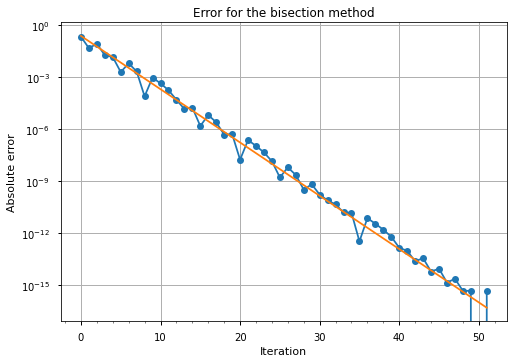

In [73]:
# Plot absolute error
fig, ax = plt.subplots()
plt.plot( abs(history-trueAnswer) ,'o-')
ax.set_yscale('log')
ax.grid()  # Plotting info: https://github.com/matplotlib/cheatsheets
ax.minorticks_on()
ax.set_ylabel("Absolute error");
ax.set_xlabel("Iteration");
ax.set_title("Error for the bisection method");

# We can also try to fit this
coef = np.polyfit( np.array(range(len(history))), np.log(1e-20+np.array(abs(history-trueAnswer))), 1   )
rho, const = np.exp(coef)

plt.plot( const*rho**np.array(range(len(history))) );
print("using a least-squares fit, the average error decay is linear with base rho = ", rho)